# Sales Prediction
## ( Simple Linear Regression)

### Problem Statement

Build a model which predicts sales based on the money spent on different platforms for marketing.

### Data
Use the advertising dataset and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model. 

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Reading and Understanding the Data

In [1]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Inspection

In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Cleaning

In [6]:
# Checking Null values
advertising.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

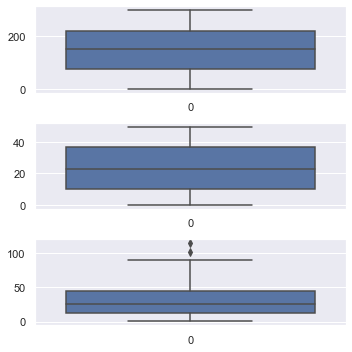

In [7]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Radio'], ax = axs[1])
plt3 = sns.boxplot(advertising['Newspaper'], ax = axs[2])
plt.tight_layout()

In [8]:
# There are no considerable outliers present in the data.

## Exploratory Data Analysis

### Univariate Analysis

#### Sales (Target Variable)

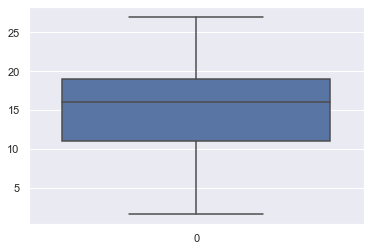

In [9]:
sns.boxplot(advertising['Sales'])
plt.show()

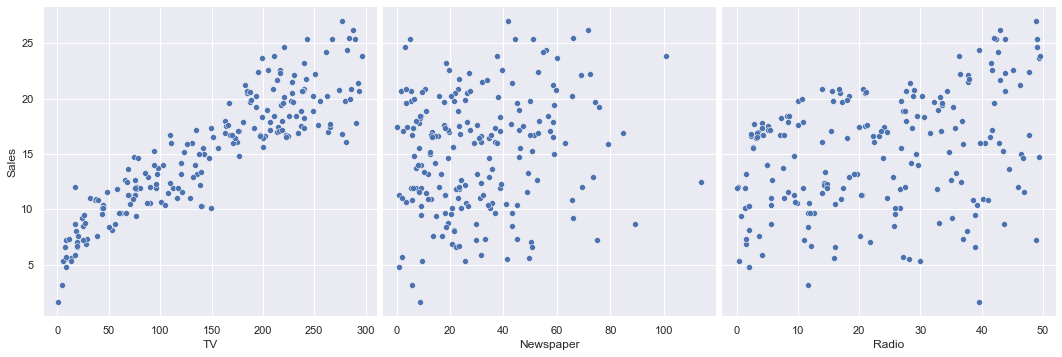

In [10]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=5, aspect=1, kind='scatter')
plt.show()

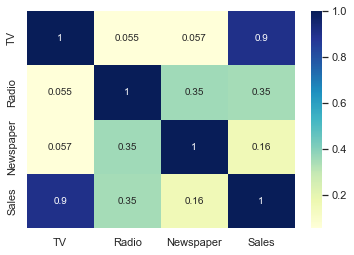

In [11]:
# visualize the strength of relationships between numerical variables
# Let's see the correlation between different variables.

sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

## Model Building

### Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

# Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [12]:
X = advertising['TV']
y = advertising['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 80% of the data in your train dataset and the rest 20% in your test dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
# Let's now take a look at the train dataset
pd.DataFrame(X_train.head())

,TV
134,36.9
66,31.5
26,142.9
113,209.6
168,215.4


In [15]:
pd.DataFrame(y_train.head())

,Sales
134,10.8
66,11.0
26,15.0
113,20.9
168,17.1


#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [16]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [17]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [18]:
X_train_sm

,const,TV
134,1.0,36.9
66,1.0,31.5
26,1.0,142.9
113,1.0,209.6
168,1.0,215.4
...,...,...
67,1.0,139.3
192,1.0,17.2
117,1.0,76.4
47,1.0,239.9


In [19]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    7.162276
TV       0.054434
dtype: float64

In [20]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.0
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           1.73e-59
Time:                        20:54:26   Log-Likelihood:                -353.74
No. Observations:                 160   AIC:                             711.5
Df Residuals:                     158   BIC:                             717.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1623      0.358     19.997      0.000       6.455       7.870
TV             0.0544      0.002     26.249      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.451   Durbin-Watson:                   2.293
Prob(Omnibus):                  0.798   Jarque-Bera (JB):                0.592
Skew:                           0.100   Prob(JB):                        0.744
Kurtosis:                       2.779   Cond. No.                         352.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

* Adjusted R-squared, a modified version of R-squared, adds precision and reliability by considering the impact of additional independent variables that tend to skew the results of R-squared measurements.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

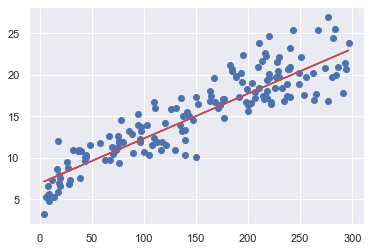

In [21]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

## Model Evaluation

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [22]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

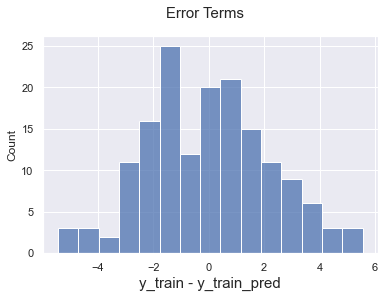

In [23]:
fig = plt.figure()
sns.histplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

### Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [24]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [25]:
X_test_sm

,const,TV
18,1.0,69.2
170,1.0,50.0
107,1.0,90.4
98,1.0,289.7
177,1.0,170.2
182,1.0,56.2
5,1.0,8.7
146,1.0,240.1
12,1.0,23.8
152,1.0,197.6


In [26]:
y_pred.head()

18     10.929130
170     9.883991
107    12.083137
98     22.931893
177    16.426994
dtype: float64

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit

In [28]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.5766434030651766

###### Checking the R-squared on the test set

In [29]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8010943934328408

##### Visualizing the fit on the test set

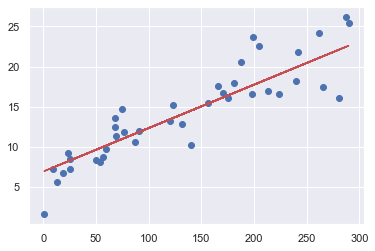

In [30]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()